# 集成多个模型，每个模型都在尝试增强（boosting）整体的效果

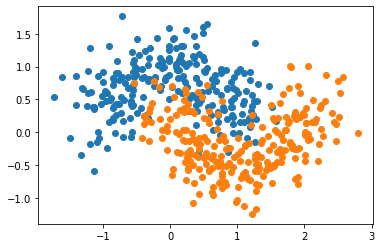

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

# Ada boosting
# base estimators:any
## 训练一个模型m1, 产生误分类样本点y1
## 针对误分类样本点训练第二个模型m2, 产生误分类样本点y2
## ...
## 最终的结果为所有模型累加的结果

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                            n_estimators=500)

In [4]:
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.832

# gradient boosting
# base estimators:decision tree
## 训练一个模型m1, 产生错误e1
## 针对错误e1训练第二个模型m2, 产生错误e2;
## ...
## 最终预测结果为m1+m2+m3+...

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.848

# Boosting解决回归问题

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor